YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  8 of 8 completed


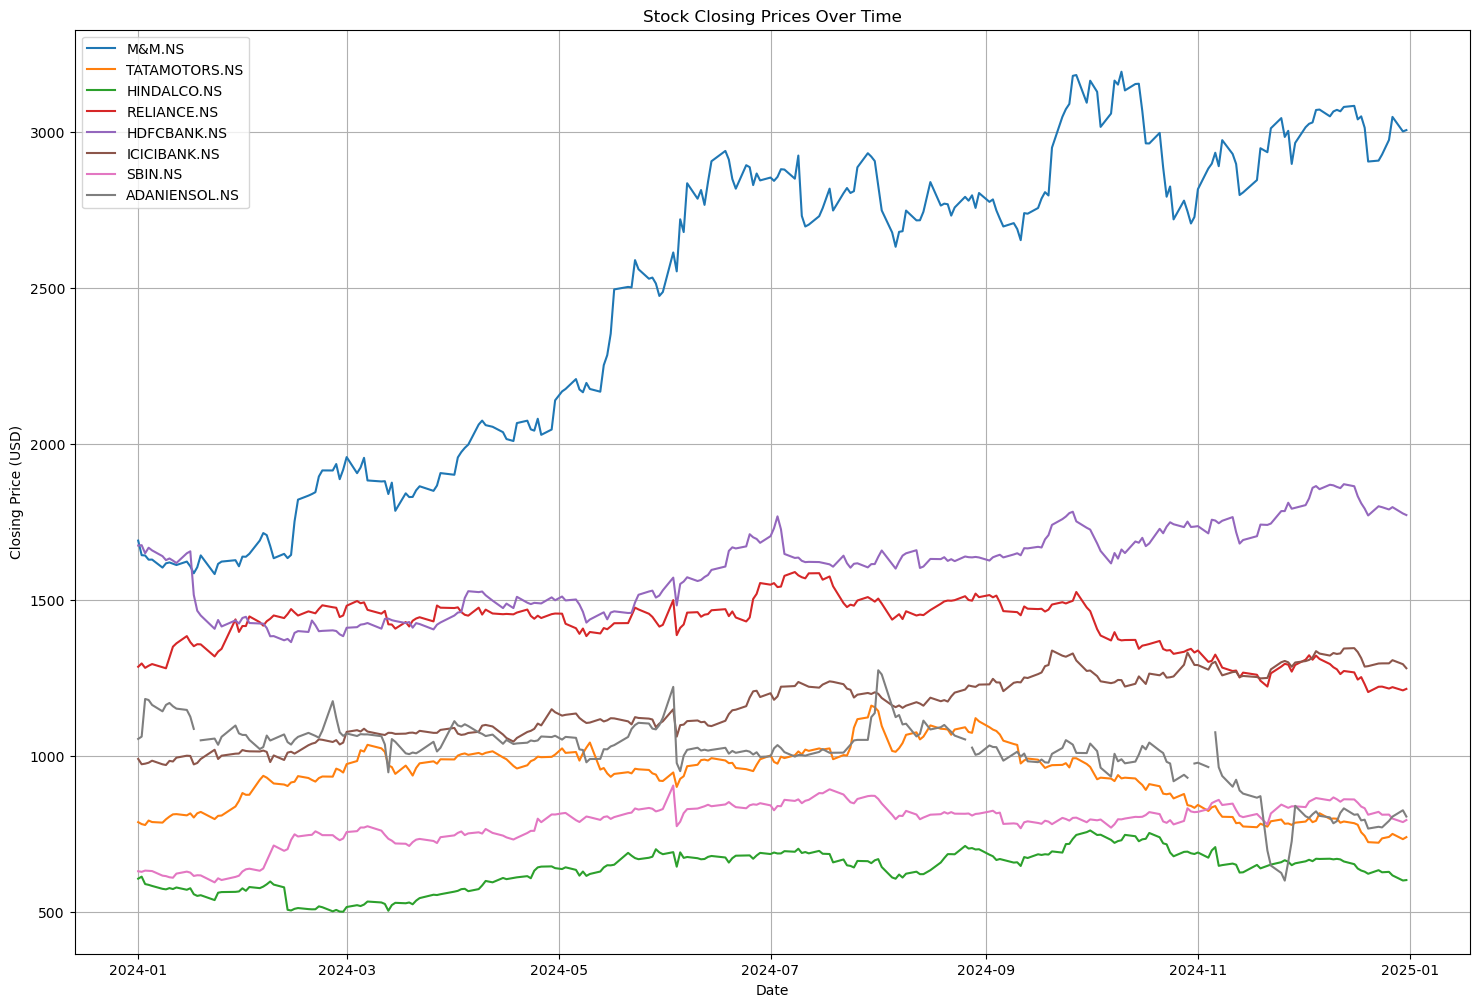

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define stocks and fetch data
stocks = ['M&M.NS', 'TATAMOTORS.NS', 'HINDALCO.NS', 'RELIANCE.NS', 'HDFCBANK.NS' ,'ICICIBANK.NS', 'SBIN.NS' , 'ADANIENSOL.NS' , ]
start_date = '2024-01-01'
end_date = '2025-01-01'

# Download stock data
data = yf.download(stocks, start=start_date, end=end_date)['Close']

# Plot closing prices over time
plt.figure(figsize=(18, 12))
for stock in stocks:
    plt.plot(data.index, data[stock], label=stock)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  8 of 8 completed


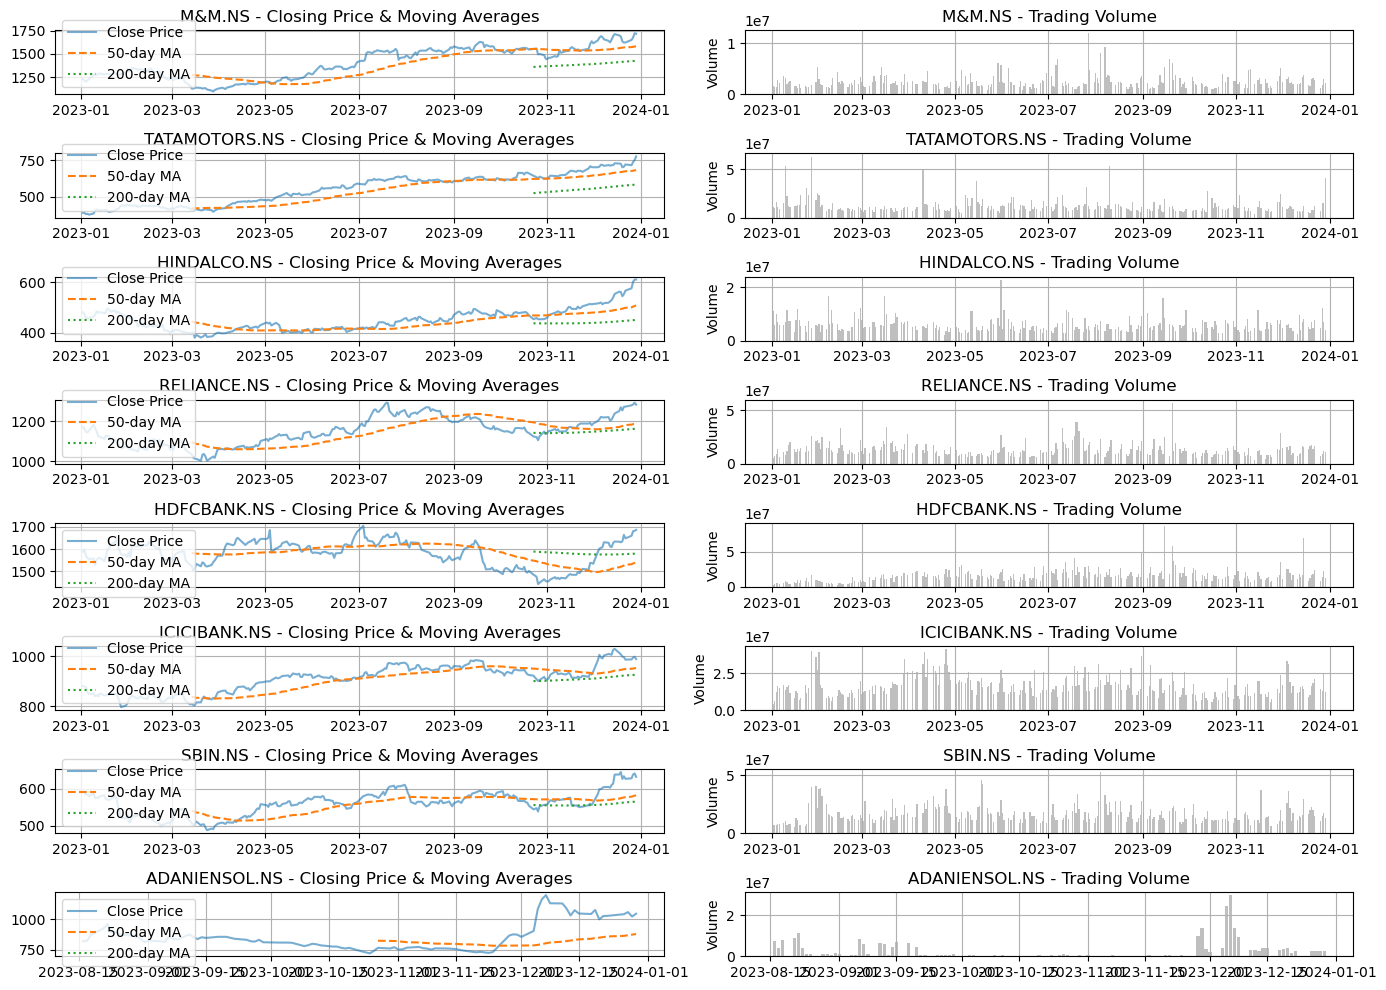

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define stocks and fetch data
stocks = ['M&M.NS', 'TATAMOTORS.NS', 'HINDALCO.NS', 'RELIANCE.NS', 'HDFCBANK.NS' ,'ICICIBANK.NS', 'SBIN.NS' , 'ADANIENSOL.NS']
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download stock data (including Volume)
data = yf.download(stocks, start=start_date, end=end_date)[['Close', 'Volume']]

# Plot Moving Averages and Volume
fig, axes = plt.subplots(nrows=len(stocks), ncols=2, figsize=(14, 10))

for i, stock in enumerate(stocks):
    # Compute Moving Averages
    data[stock, '50MA'] = data['Close'][stock].rolling(window=50).mean()
    data[stock, '200MA'] = data['Close'][stock].rolling(window=200).mean()

    # Plot Closing Price with MAs
    axes[i, 0].plot(data.index, data['Close'][stock], label='Close Price', alpha=0.6)
    axes[i, 0].plot(data.index, data[stock, '50MA'], label='50-day MA', linestyle='dashed')
    axes[i, 0].plot(data.index, data[stock, '200MA'], label='200-day MA', linestyle='dotted')
    axes[i, 0].set_title(f'{stock} - Closing Price & Moving Averages')
    axes[i, 0].legend()
    axes[i, 0].grid()

    # Plot Volume
    axes[i, 1].bar(data.index, data['Volume'][stock], color='gray', alpha=0.5)
    axes[i, 1].set_title(f'{stock} - Trading Volume')
    axes[i, 1].set_ylabel('Volume')
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

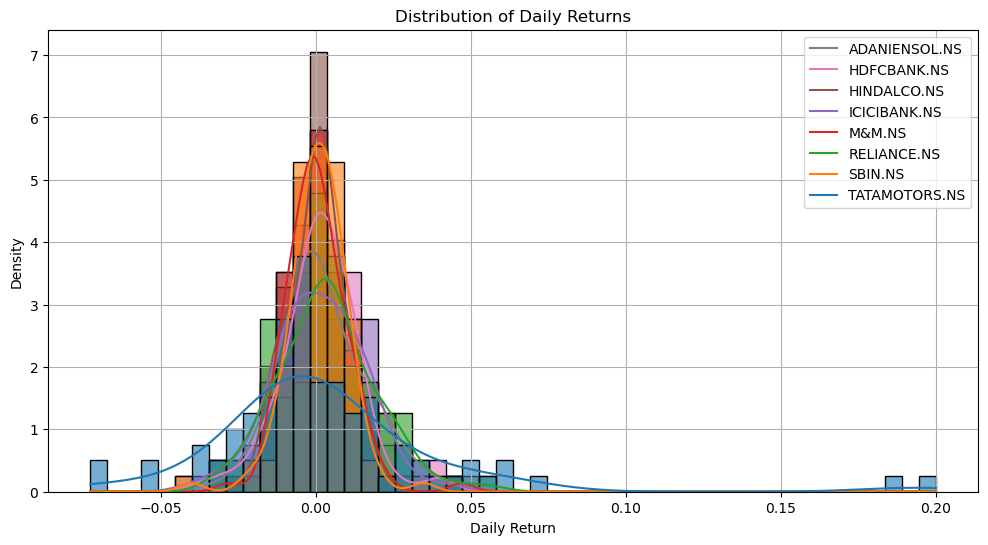

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate daily returns
daily_returns = data['Close'].pct_change().dropna()

# Plot histogram and KDE for daily returns
plt.figure(figsize=(12, 6))
sns.histplot(daily_returns, bins=50, kde=True, stat="density", alpha=0.6)

plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend(daily_returns.columns)
plt.grid()
plt.show()

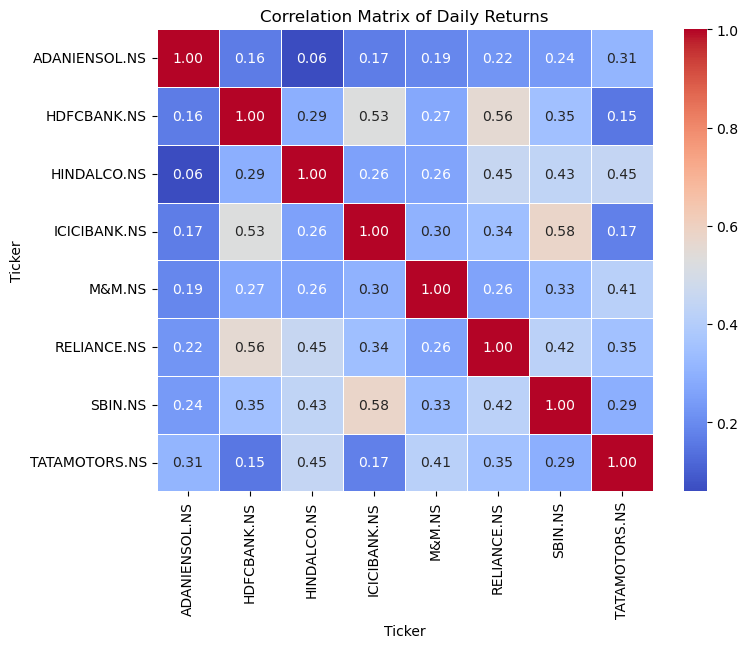

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = daily_returns.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Correlation Matrix of Daily Returns")
plt.show()

In [5]:
import pandas as pd

# Annualized expected return & volatility
expected_returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year
volatility = daily_returns.std() * np.sqrt(252)

# Create DataFrame
stock_metrics = pd.DataFrame({
    "Expected Return (%)": expected_returns * 100,
    "Volatility (%)": volatility * 100
}).round(2)

# Display the results
print(stock_metrics)

               Expected Return (%)  Volatility (%)
Ticker                                            
ADANIENSOL.NS                85.86           61.82
HDFCBANK.NS                  18.40           15.38
HINDALCO.NS                  92.61           24.93
ICICIBANK.NS                 12.62           15.91
M&M.NS                       29.31           23.03
RELIANCE.NS                   3.98           14.04
SBIN.NS                      37.18           19.73
TATAMOTORS.NS                66.62           22.23


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

In [7]:
# Number of portfolios to simulate
num_portfolios = 10000

# Arrays to store results
results = np.zeros((3, num_portfolios))

# Annualized covariance matrix
cov_matrix = daily_returns.cov() * 252  

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(stock_metrics))
    weights /= np.sum(weights)  # Normalize weights to sum to 1

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

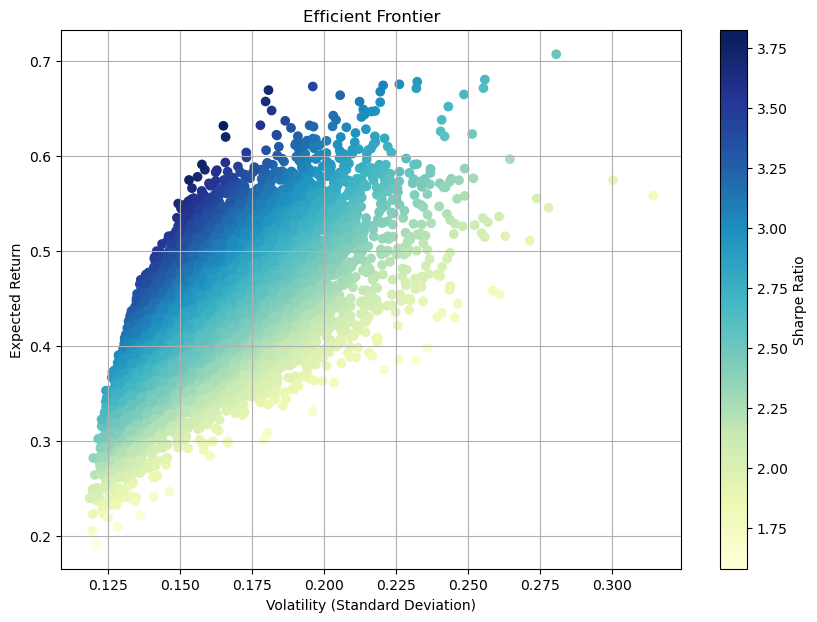

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [9]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.6316122237599471, 0.16505590400359635, 3.8266563536326763)

In [10]:
max_sharpe_weights = np.zeros(len(stock_metrics))

for i in range(num_portfolios):
    weights = np.random.random(len(stock_metrics))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': stock_metrics.index,
    'Weight': max_sharpe_weights * 100  # Convert to percentage
}).round(2)

print(portfolio_weights_df)

          Ticker  Weight
0  ADANIENSOL.NS   20.17
1    HDFCBANK.NS    6.14
2    HINDALCO.NS    5.15
3   ICICIBANK.NS    3.36
4         M&M.NS   24.91
5    RELIANCE.NS   11.14
6        SBIN.NS   14.77
7  TATAMOTORS.NS   14.35
